In [1]:
import matplotlib.pyplot as plt

import numpy   as np
import pandas  as pd
import seaborn as sns

In [2]:
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,9)

In [3]:
histories_path = "../histories/"

In [3]:
!cat ../histories/largeRAM/config_lRAM_TSA_0_CNN_valAcc0.712_124853_20200320 #FastText
# !cat ../histories/largeRAM/config_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320 #GloVe

# !cat ../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320 #FastText
# !cat ../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.706_132245_20200320 #GloVe

# !cat ../histories/largeRAM/config_lRAM_TSA_0_BiLSTM_valAcc0.714_134843_20200320 #GloVe


cat: ../histories/largeRAM/config_lRAM_TSA_0_CNN_valAcc0.712_124853_20200320: No such file or directory


# Final Course Presentation Survey plots:

# RoBERTa vs Transformer

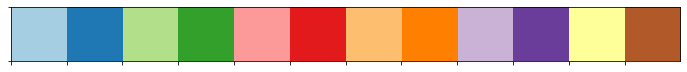

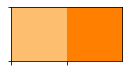

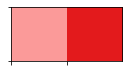

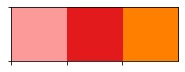

In [73]:
sns.palplot(sns.color_palette("Paired"))
sns.palplot(sns.color_palette("Paired")[6:8])
sns.palplot(sns.color_palette("Paired")[4:6])
RoBERTa_colors = sns.color_palette("Paired")[6:8]
RoBERTa_colors = sns.color_palette("Paired")[4:6] + sns.color_palette("Paired")[7:8]
sns.palplot(RoBERTa_colors)

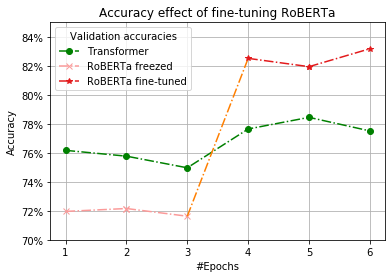

In [81]:
h_RoBERTa_freezed   = "../histories/BERT/RobertaForSequenceClassification_Base_freezed.csv"
h_RoBERTa_finetuned = "../histories/BERT/RobertaForSequenceClassification_Base_fine-tuned.csv"
h_Transformer       = "../histories/survey/history_lRAM_OPT_0_Transformer_GloVe_valAcc0.739_115454_20200514.csv"

hist_df_RB_fr = pd.read_csv(h_RoBERTa_freezed)
hist_df_RB_ft = pd.read_csv(h_RoBERTa_finetuned)
hist_df_RB    = np.hstack([hist_df_RB_fr["Valid. Accur."][-3:]\
                           , hist_df_RB_ft["Valid. Accur."][:3]])
hist_df_Tran  = pd.read_csv(h_Transformer)["val_accuracy"][:6]

# plt.plot(np.hstack([hist_df_RB_fr["Valid. Accur."][-3:], hist_df_RB_ft["Valid. Accur."][:3]]))
# plt.plot(hist_df_Tran["val_accuracy"][:6])


figure = plt.figure()

# plt.title("Accuracy improvement using different Batch Sizes, on $1/-1$ setting")
plt.title("Accuracy effect of fine-tuning RoBERTa")#, on $1/-1$ setting")
# lc = ['b', 'purple', 'y', 'r', "g",'orange', "#3385ff", "#9999ff", "#009999", "#ff00ff", 'c', 'm', 'y', 'k']#[::-1]#line_colors
lc = ['g', "#ff00ff", 'orange', 'r']#[3:]
# tr_marker   = "^"
# tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."



plt_Tran,  = plt.plot(hist_df_Tran, marker=vl_marker, linestyle=vl_ls, c=lc[0]\
                      , label="Transformer")

#plotRoberta with two colors 
x = range(len(hist_df_RB))
y = hist_df_RB
for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
    if x2 == len(hist_df_RB)//2:
        plt_rb, = plt.plot([x1, x2], [y1, y2], linestyle=vl_ls\
                           , c=RoBERTa_colors[2])
        continue
    if x2+1 > len(hist_df_RB)/2:            
        plt_rb, = plt.plot([x1, x2], [y1, y2], marker="*", linestyle=vl_ls, c=RoBERTa_colors[1])
        if x2-2 < len(hist_df_RB)/2:
            plt_rb.set_label("RoBERTa fine-tuned")
    else:
        plt_rb, = plt.plot([x1, x2], [y1, y2], marker="x", linestyle=vl_ls, c=RoBERTa_colors[0])
        if x2+2 > len(hist_df_RB)/2:
            plt_rb.set_label("RoBERTa freezed")
            
            
# #plotRoberta with two colors 
# x = range(len(hist_df_RB))
# y = hist_df_RB
# for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
# #     "RoBERTa fine-tuned"
#     if x2+1 > len(hist_df_RB)/2:            
#         plt_rb, = plt.plot([x1, x2], [y1, y2], marker="*", linestyle=vl_ls, c=RoBERTa_colors[1])
#         if x2-1 < len(hist_df_RB)/2:
#             plt_rb.set_label("RoBERTa fine-tuned")
# #     "RoBERTa freezed"
#     else:
#         plt_rb, = plt.plot([x1, x2], [y1, y2], marker="x", linestyle=vl_ls, c=RoBERTa_colors[0])
#         if x2+2 > len(hist_df_RB)/2:
#             plt_rb.set_label("RoBERTa freezed")
#     if y1 > y2:
#         plt.plot([x1, x2], [y1, y2], 'r')
#     elif y1 < y2:
#         plt.plot([x1, x2], [y1, y2], 'g')
#     else:
#         plt.plot([x1, x2], [y1, y2], 'b')
        
# plt_RB,    = plt.plot(hist_df_RB, marker="*", linestyle=vl_ls, c=lc[1])





# plots  = [plt_RB, plt_Tran]
# labels = ["RoBERTa", "Transformer"]

# legend = plt.legend(plots, labels#, loc=2
#                         #, loc=(1.05, .2)\
#                         , title="Validation accuracies")

plt.legend(title="Validation accuracies")

# plt.gca().add_artist(legend)

plt.ylabel("Accuracy")
yticks = np.arange(0.7,.84,.020)#[.1, .2, .3, .4] 
plt.yticks(yticks
           , [str(int(yt * 100)) + "%" for yt in yticks])

plt.xlabel("#Epochs")
plt.xticks(range(len(hist_df_Tran)), range(1, len(hist_df_Tran)+1))
plt.grid()
plt.ylim(0.7, ymax = .85)
# plt.xlim(.95, len(hist_df_BS16))
# plt.legend()
plt.show()

figure.savefig("../plots/Transformer_vs_RoBERTa.pdf", bbox_inches='tight')
figure.savefig("../plots/Transformer_vs_RoBERTa.png", bbox_inches='tight')

# BERT plots

In [4]:
h_XLNet_fr_0   = "../histories/BERT/XLNetForSequenceClassification_Base_ freezed.csv"
h_XLNet_ft_0   = "../histories/BERT/XLNetForSequenceClassification_Base_ fine-tuned.csv"
h_XLNet_fr_1M1 = "../histories/BERT/XLNetForSequenceClassification_Base_ freezed_set1M1.csv"
h_XLNet_ft_1M1 = "../histories/BERT/XLNetForSequenceClassification_Base_ fine-tuned_set1M1.csv"

# h_bil_0        = "../histories/survey/history_lRAM_OPT_0_BiLSTM_FastText_valAcc0.716_111023_20200511.csv"
h_bil_0        = "../histories/fullstack/largeRAM/OPT_0/history_lRAM_OPT_0_BiLSTM_valAcc0.714_211141_20200323.csv"
h_gru_0        = "../histories/survey/history_GL800_OPT_0_GRUStack_GloVe_valAcc0.728_120516_20200513.csv"

# h_bil_1M1      = "../histories/survey/history_lRAM_OPT_1M1_BiLSTM_FastText_valAcc0.865_111628_20200511.csv"
h_bil_1M1      = "../histories/fullstack/largeRAM/OPT_1M1/history_lRAM_OPT_1M1_BiLSTM_valAcc0.859_191300_20200319.csv"
h_gru_1M1      = "../histories/survey/history_BS16_OPT_1M1_GRUStack_GloVe_valAcc0.891_121633_20200513.csv"


hist_df_bil_0   = pd.read_csv(h_bil_0)
hist_df_bil_1M1 = pd.read_csv(h_bil_1M1)
hist_df_gru_0   = pd.read_csv(h_gru_0)
hist_df_gru_1M1 = pd.read_csv(h_gru_1M1)

# hist_df_bil_0, 
hist_df_bil_1M1.head()
hist_df_XLNet_fr_0    = pd.read_csv(h_XLNet_fr_0)
hist_df_XLNet_ft_0    = pd.read_csv(h_XLNet_ft_0)
hist_df_XLNet_fr_1M1  = pd.read_csv(h_XLNet_fr_1M1)
hist_df_XLNet_ft_1M1  = pd.read_csv(h_XLNet_ft_1M1)

# hist_df_df_bil_0, 
hist_df_XLNet_fr_0.head()

hist_df_gru_1M1

,Unnamed: 0,val_loss,val_accuracy,loss,accuracy
0,0,0.276006,0.880208,0.365685,0.837934
1,1,0.292558,0.888021,0.233464,0.910361
2,2,0.282536,0.893229,0.160213,0.944462
3,3,0.420373,0.875000,0.111714,0.953881
4,4,0.486300,0.895833,0.068872,0.972718
5,5,0.554644,0.888021,0.041062,0.986359
6,6,0.495708,0.875000,0.017933,0.994479
7,7,0.743629,0.898438,0.010016,0.997077
8,8,0.736846,0.875000,0.010153,0.997402
9,9,0.886446,0.877604,0.000940,1.000000


In [34]:
path_deviation

array([0.11197916, 0.03645831, 0.01171875, 0.01953125, 0.01432291,
       0.0078125 , 0.00520834, 0.01822916, 0.00911459, 0.00911459,
       0.00911456, 0.0078125 , 0.01432291, 0.01692709, 0.01432291,
       0.015625  , 0.01432291, 0.01432291, 0.01432291, 0.01432291,
       0.01432291, 0.01692709, 0.01692709, 0.01692709, 0.015625  ,
       0.01692709, 0.01692709, 0.01692709, 0.01692709, 0.015625  ])

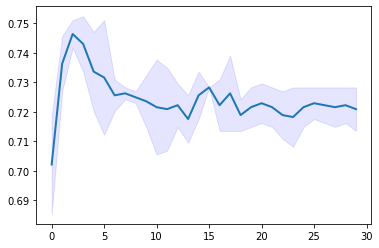

In [38]:
hist_context_0_vl = np.vstack([hist_df_gru_0["val_accuracy"]\
                             , hist_df_bil_0["val_accuracy"]])

smooth_path_0_vl     = hist_context_0_vl.mean(axis=0)
path_deviation_0_vl  = hist_context_0_vl.std(axis=0)

under_line_0_vl     = (smooth_path-path_deviation)#[0]
over_line_0_vl      = (smooth_path+path_deviation)#[0]

#Plotting:
plt.plot(smooth_path_0_vl, linewidth=2) #mean curve.
plt.fill_between(hist_df_gru_1M1.index, under_line_0_vl, over_line_0_vl, color='b', alpha=.1) #std curves.

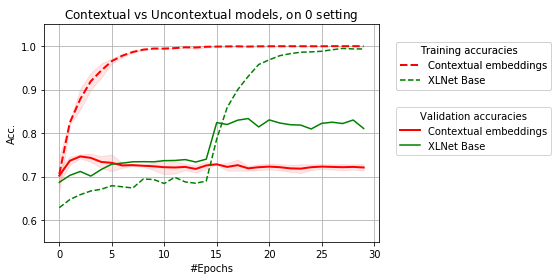

In [5]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Contextual vs Uncontextual models, on $0$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_marker   = ""
tr_ls       = "--" #Line styles
vl_marker   = "o"
vl_marker   = ""
vl_ls       = "-."
vl_ls       = "-"

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

hist_vl_XLN = np.hstack([hist_df_XLNet_fr_0["Valid. Accur."] \
            , hist_df_XLNet_ft_0["Valid. Accur."]])
hist_tr_XLN = np.hstack([hist_df_XLNet_fr_0["Training Accur."] \
            , hist_df_XLNet_ft_0["Training Accur."]])


# plt_vl_bil_0, = plt.plot(hist_df_bil_0["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
hist_context_0_vl = np.vstack([hist_df_gru_0["val_accuracy"]\
                             , hist_df_bil_0["val_accuracy"]])

smooth_path_0_vl     = hist_context_0_vl.mean(axis=0)
path_deviation_0_vl  = hist_context_0_vl.std(axis=0)

under_line_0_vl     = (smooth_path_0_vl-path_deviation_0_vl)#[0]
over_line_0_vl      = (smooth_path_0_vl+path_deviation_0_vl)#[0]

#Plotting:
plt_vl_context_0, = plt.plot(smooth_path_0_vl, linewidth=2, marker=vl_marker, linestyle=vl_ls, c=lc[0]) #mean curve.
plt.fill_between(hist_df_gru_1M1.index, under_line_0_vl, over_line_0_vl, color=lc[0], alpha=.1) #std curves.



plt_vl_XLN_0, = plt.plot(hist_vl_XLN, marker=vl_marker, linestyle=vl_ls, c=lc[1])
# plt_vl_gru_0, = plt.plot(hist_df_gru_0["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])

val_plots  = [plt_vl_context_0, plt_vl_XLN_0]
val_labels = ["Contextual embeddings", "XLNet Base"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .4), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

# plt_tr_bil_0, = plt.plot(hist_df_bil_0["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])

hist_context_0_tr = np.vstack([hist_df_gru_0["accuracy"]\
                             , hist_df_bil_0["accuracy"]])

smooth_path_0_tr     = hist_context_0_tr.mean(axis=0)
path_deviation_0_tr  = hist_context_0_tr.std(axis=0)

under_line_0_tr     = (smooth_path_0_tr-path_deviation_0_tr)#[0]
over_line_0_tr      = (smooth_path_0_tr+path_deviation_0_tr)#[0]

#Plotting:
plt_tr_context_0, = plt.plot(smooth_path_0_tr, linewidth=2, marker=tr_marker, linestyle=tr_ls, c=lc[0]) #mean curve.
plt.fill_between(hist_df_gru_1M1.index, under_line_0_tr, over_line_0_tr, color=lc[0], alpha=.1) #std curves.


plt_tr_XLN_0, = plt.plot(hist_tr_XLN, marker=tr_marker, linestyle=tr_ls, c=lc[1])
# plt_tr_gru_0, = plt.plot(hist_df_gru_0["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
tr_plots  = [plt_tr_context_0, plt_tr_XLN_0]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .7), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/XLNtvsContextual_0.pdf", bbox_inches='tight')
figure.savefig("../plots/XLNtvsContextual_0.png", bbox_inches='tight')

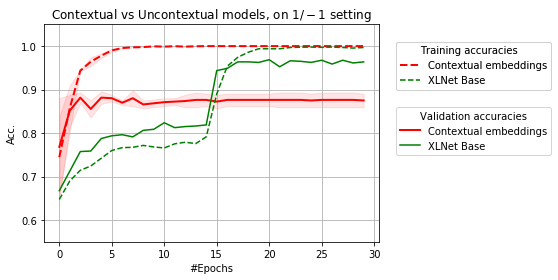

In [6]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_1M1_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Contextual vs Uncontextual models, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_marker   = ""
tr_ls       = "--" #Line styles
vl_marker   = "o"
vl_marker   = ""
vl_ls       = "-."
vl_ls       = "-"

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

hist_vl_XLN = np.hstack([hist_df_XLNet_fr_1M1["Valid. Accur."] \
            , hist_df_XLNet_ft_1M1["Valid. Accur."]])
hist_tr_XLN = np.hstack([hist_df_XLNet_fr_1M1["Training Accur."] \
            , hist_df_XLNet_ft_1M1["Training Accur."]])


# plt_vl_bil_1M1, = plt.plot(hist_df_bil_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
hist_context_1M1_vl = np.vstack([hist_df_gru_1M1["val_accuracy"]\
                             , hist_df_bil_1M1["val_accuracy"]])

smooth_path_1M1_vl     = hist_context_1M1_vl.mean(axis=0)
path_deviation_1M1_vl  = hist_context_1M1_vl.std(axis=0)

under_line_1M1_vl     = (smooth_path_1M1_vl-path_deviation_1M1_vl)#[0]
over_line_1M1_vl      = (smooth_path_1M1_vl+path_deviation_1M1_vl)#[0]

#Plotting:
plt_vl_context_1M1, = plt.plot(smooth_path_1M1_vl, linewidth=2, marker=vl_marker, linestyle=vl_ls, c=lc[0]) #mean curve.
plt.fill_between(hist_df_gru_1M1.index, under_line_1M1_vl, over_line_1M1_vl, color=lc[0], alpha=.1) #std curves.



plt_vl_XLN_1M1, = plt.plot(hist_vl_XLN, marker=vl_marker, linestyle=vl_ls, c=lc[1])
# plt_vl_gru_1M1, = plt.plot(hist_df_gru_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])

val_plots  = [plt_vl_context_1M1, plt_vl_XLN_1M1]
val_labels = ["Contextual embeddings", "XLNet Base"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .4), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

# plt_tr_bil_1M1, = plt.plot(hist_df_bil_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])

hist_context_1M1_tr = np.vstack([hist_df_gru_1M1["accuracy"]\
                             , hist_df_bil_1M1["accuracy"]])

smooth_path_1M1_tr     = hist_context_1M1_tr.mean(axis=0)
path_deviation_1M1_tr  = hist_context_1M1_tr.std(axis=0)

under_line_1M1_tr     = (smooth_path_1M1_tr-path_deviation_1M1_tr)#[0]
over_line_1M1_tr      = (smooth_path_1M1_tr+path_deviation_1M1_tr)#[0]

#Plotting:
plt_tr_context_1M1, = plt.plot(smooth_path_1M1_tr, linewidth=2, marker=tr_marker, linestyle=tr_ls, c=lc[0]) #mean curve.
plt.fill_between(hist_df_gru_1M1.index, under_line_1M1_tr, over_line_1M1_tr, color=lc[0], alpha=.1) #std curves.


plt_tr_XLN_1M1, = plt.plot(hist_tr_XLN, marker=tr_marker, linestyle=tr_ls, c=lc[1])
# plt_tr_gru_1M1, = plt.plot(hist_df_gru_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
tr_plots  = [plt_tr_context_1M1, plt_tr_XLN_1M1]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .7), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/XLNtvsContextual_1M1.pdf", bbox_inches='tight')
figure.savefig("../plots/XLNtvsContextual_1M1.png", bbox_inches='tight')

In [11]:
np.hstack([hist_df_XLNet_fr_1M1["Valid. Accur."] \
            , hist_df_XLNet_ft_1M1["Valid. Accur."]])

array([0.6675 , 0.7125 , 0.7575 , 0.75875, 0.7875 , 0.79375, 0.79625,
       0.79125, 0.80625, 0.80875, 0.82375, 0.8125 , 0.815  , 0.81625,
       0.81875, 0.94375, 0.94875, 0.96375, 0.96375, 0.9625 , 0.96875,
       0.9525 , 0.96625, 0.965  , 0.9625 , 0.9675 , 0.95875, 0.9675 ,
       0.96125, 0.96375])

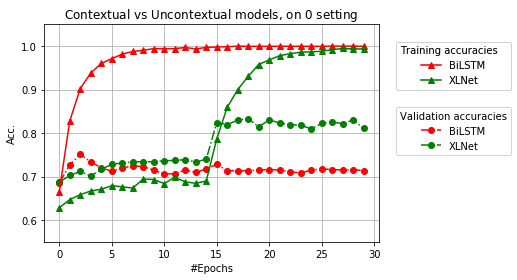

In [19]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Contextual vs Uncontextual models, on $0$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

hist_vl_XLN = np.hstack([hist_df_XLNet_fr_0["Valid. Accur."] \
            , hist_df_XLNet_ft_0["Valid. Accur."]])
hist_tr_XLN = np.hstack([hist_df_XLNet_fr_0["Training Accur."] \
            , hist_df_XLNet_ft_0["Training Accur."]])


plt_vl_bil_0, = plt.plot(hist_df_bil_0["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_XLN_0, = plt.plot(hist_vl_XLN, marker=vl_marker, linestyle=vl_ls, c=lc[1])
# plt_vl_gru_0, = plt.plot(hist_df_gru_0["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])

val_plots  = [plt_vl_bil_0, plt_vl_XLN_0]
val_labels = ["BiLSTM", "XLNet"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .4), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_bil_0, = plt.plot(hist_df_bil_0["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_XLN_0, = plt.plot(hist_tr_XLN, marker=tr_marker, linestyle=tr_ls, c=lc[1])
# plt_tr_gru_0, = plt.plot(hist_df_gru_0["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
tr_plots  = [plt_tr_bil_0, plt_tr_XLN_0]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .7), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/XLNtvsContextual_0.pdf", bbox_inches='tight')
figure.savefig("../plots/XLNtvsContextual_0.png", bbox_inches='tight')

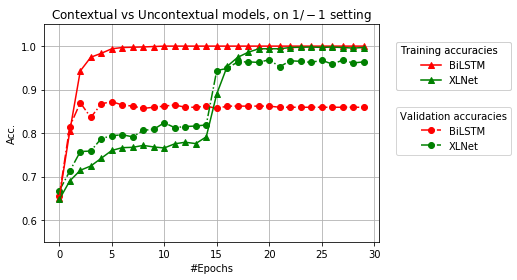

In [20]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Contextual vs Uncontextual models, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

hist_vl_XLN = np.hstack([hist_df_XLNet_fr_1M1["Valid. Accur."] \
            , hist_df_XLNet_ft_1M1["Valid. Accur."]])
hist_tr_XLN = np.hstack([hist_df_XLNet_fr_1M1["Training Accur."] \
            , hist_df_XLNet_ft_1M1["Training Accur."]])


plt_vl_bil_1M1, = plt.plot(hist_df_bil_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_XLN_1M1, = plt.plot(hist_vl_XLN, marker=vl_marker, linestyle=vl_ls, c=lc[1])
# plt_vl_gru_1M1, = plt.plot(hist_df_gru_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])

val_plots  = [plt_vl_bil_1M1, plt_vl_XLN_1M1]
val_labels = ["BiLSTM", "XLNet"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .4), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_bil_1M1, = plt.plot(hist_df_bil_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_XLN_1M1, = plt.plot(hist_tr_XLN, marker=tr_marker, linestyle=tr_ls, c=lc[1])
# plt_tr_gru_1M1, = plt.plot(hist_df_gru_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
tr_plots  = [plt_tr_bil_1M1, plt_tr_XLN_1M1]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .7), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/XLNtvsContextual_1M1.pdf", bbox_inches='tight')
figure.savefig("../plots/XLNtvsContextual_1M1.png", bbox_inches='tight')

# Batch Size comparison

In [1]:
import matplotlib.pyplot as plt

import numpy   as np
import pandas  as pd
import seaborn as sns

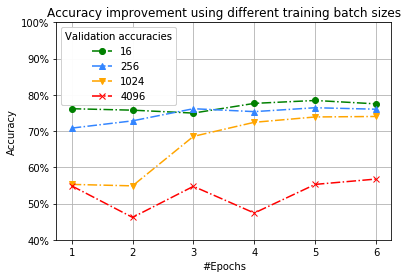

In [35]:
#Setting 1/-1
# h_BS16   = "../histories/classic/survey/history_BS16_OPT_1M1_GRUStack_FastText_valAcc0.901_103433_20200511.csv"
# h_BS256  = "../histories/classic/survey/history_BS256_OPT_1M1_GRUStack_FastText_valAcc0.878_110149_20200511.csv"
# h_BS1024 = "../histories/classic/survey/history_BS1024_OPT_1M1_GRUStack_FastText_valAcc0.833_103728_20200511.csv"
# h_BS4096 = "../histories/classic/survey/history_BS4096_OPT_1M1_GRUStack_FastText_valAcc0.823_103958_20200511.csv"


#Setting 0
h_BS16   = "../histories/classic/survey/history_lRAM_OPT_0_Transformer_GloVe_valAcc0.739_115454_20200514.csv"
h_BS256  = "../histories/classic/survey/history_BS256_OPT_0_Transformer_GloVe_valAcc0.754_091655_20200626.csv"
h_BS1024 = "../histories/classic/survey/history_BS1024_OPT_0_Transformer_GloVe_valAcc0.764_091356_20200626.csv"
h_BS4096 = "../histories/classic/survey/history_BS4096_OPT_0_Transformer_GloVe_valAcc0.735_090908_20200626.csv"

num_visible    = 6
hist_df_BS16   = pd.read_csv(h_BS16)[:num_visible]
hist_df_BS256  = pd.read_csv(h_BS256)[:num_visible]
hist_df_BS1024 = pd.read_csv(h_BS1024)[:num_visible]
hist_df_BS4096 = pd.read_csv(h_BS4096)[:num_visible]

# hist_df_df_bil_0, 
hist_df_BS4096.head()

#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]
#Setting 0

figure = plt.figure()

# plt.title("Accuracy improvement using different Batch Sizes, on $1/-1$ setting")
plt.title("Accuracy improvement using different training batch sizes")#, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', "#3385ff", "#9999ff", "#009999", "#ff00ff", 'c', 'm', 'y', 'k']#[::-1]#line_colors
lc = ['g', "#3385ff", 'orange', 'r']#[3:]
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_BS16, = plt.plot(hist_df_BS16["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_BS256,  = plt.plot(hist_df_BS256["val_accuracy"], marker="^", linestyle=vl_ls, c=lc[1])
plt_vl_BS1024, = plt.plot(hist_df_BS1024["val_accuracy"], marker="v", linestyle=vl_ls, c=lc[2])
plt_vl_BS4096, = plt.plot(hist_df_BS4096["val_accuracy"], marker="x", linestyle=vl_ls, c=lc[3])

val_plots  = [plt_vl_BS16, plt_vl_BS256, plt_vl_BS1024, plt_vl_BS4096]
val_labels = ["16", "256", "1024", "4096"]

val_legend = plt.legend(val_plots, val_labels#, loc=2
                        #, loc=(1.05, .2)\
                        , title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

# plt_tr_BS16, = plt.plot(hist_df_BS16["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
# plt_tr_BS256,  = plt.plot(hist_df_BS256["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
# plt_tr_BS1024, = plt.plot(hist_df_BS1024["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
# plt_tr_BS4096, = plt.plot(hist_df_BS4096["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[3])
# tr_plots  = [plt_tr_BS16, plt_tr_BS256, plt_tr_BS1024, plt_tr_BS4096]
# tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
# tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .6), title="Training accuracies   ")





# plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Accuracy")
plt.xlabel("#Epochs")
plt.xticks(range(len(hist_df_BS16)), range(1, len(hist_df_BS16)+1))
plt.grid()
plt.ylim(0.45, ymax = 1.0)
# yticks = range(0.4,1.05,.1)#.tolist()
yticks = [i/10 for i in range(4, 11)]
plt.yticks(yticks
           , [str(int(yt*100)) + "%" for yt in yticks])
# plt.xlim(.95, len(hist_df_BS16))
# plt.legend()
plt.show()

figure.savefig("../plots/BatchSizes_val_set0.pdf", bbox_inches='tight')
figure.savefig("../plots/BatchSizes_val_set0.png", bbox_inches='tight')

In [33]:
[i/10 for i in range(4, 11)]

[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [30]:
yticks

[]

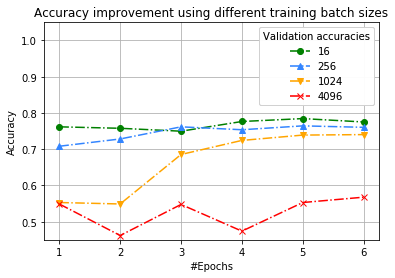

In [3]:
#Setting 1/-1
h_BS16   = "../histories/survey/history_BS16_OPT_1M1_GRUStack_FastText_valAcc0.901_103433_20200511.csv"
h_BS256  = "../histories/survey/history_BS256_OPT_1M1_GRUStack_FastText_valAcc0.878_110149_20200511.csv"
h_BS1024 = "../histories/survey/history_BS1024_OPT_1M1_GRUStack_FastText_valAcc0.833_103728_20200511.csv"
h_BS4096 = "../histories/survey/history_BS4096_OPT_1M1_GRUStack_FastText_valAcc0.823_103958_20200511.csv"


#Setting 0
h_BS16   = "../histories/survey/history_lRAM_OPT_0_Transformer_GloVe_valAcc0.739_115454_20200514.csv"
h_BS256  = "../histories/survey/history_BS256_OPT_0_Transformer_GloVe_valAcc0.754_091655_20200626.csv"
h_BS1024 = "../histories/survey/history_BS1024_OPT_0_Transformer_GloVe_valAcc0.764_091356_20200626.csv"
h_BS4096 = "../histories/survey/history_BS4096_OPT_0_Transformer_GloVe_valAcc0.735_090908_20200626.csv"

num_visible    = 6
hist_df_BS16   = pd.read_csv(h_BS16)[:num_visible]
hist_df_BS256  = pd.read_csv(h_BS256)[:num_visible]
hist_df_BS1024 = pd.read_csv(h_BS1024)[:num_visible]
hist_df_BS4096 = pd.read_csv(h_BS4096)[:num_visible]

# hist_df_df_bil_0, 
hist_df_BS4096.head()

#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]
#Setting 0

figure = plt.figure()

# plt.title("Accuracy improvement using different Batch Sizes, on $1/-1$ setting")
plt.title("Accuracy improvement using different training batch sizes")#, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', "#3385ff", "#9999ff", "#009999", "#ff00ff", 'c', 'm', 'y', 'k']#[::-1]#line_colors
lc = ['g', "#3385ff", 'orange', 'r']#[3:]
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_BS16, = plt.plot(hist_df_BS16["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_BS256,  = plt.plot(hist_df_BS256["val_accuracy"], marker="^", linestyle=vl_ls, c=lc[1])
plt_vl_BS1024, = plt.plot(hist_df_BS1024["val_accuracy"], marker="v", linestyle=vl_ls, c=lc[2])
plt_vl_BS4096, = plt.plot(hist_df_BS4096["val_accuracy"], marker="x", linestyle=vl_ls, c=lc[3])

val_plots  = [plt_vl_BS16, plt_vl_BS256, plt_vl_BS1024, plt_vl_BS4096]
val_labels = ["16", "256", "1024", "4096"]

val_legend = plt.legend(val_plots, val_labels#, loc=2
                        #, loc=(1.05, .2)\
                        , title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

# plt_tr_BS16, = plt.plot(hist_df_BS16["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
# plt_tr_BS256,  = plt.plot(hist_df_BS256["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
# plt_tr_BS1024, = plt.plot(hist_df_BS1024["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
# plt_tr_BS4096, = plt.plot(hist_df_BS4096["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[3])
# tr_plots  = [plt_tr_BS16, plt_tr_BS256, plt_tr_BS1024, plt_tr_BS4096]
# tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
# tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .6), title="Training accuracies   ")





# plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Accuracy")
plt.xlabel("#Epochs")
plt.xticks(range(len(hist_df_BS16)), range(1, len(hist_df_BS16)+1))
plt.grid()
plt.ylim(0.45, ymax = 1.05)
# plt.xlim(.95, len(hist_df_BS16))
# plt.legend()
plt.show()

figure.savefig("../plots/BatchSizes_val_set0.pdf", bbox_inches='tight')
figure.savefig("../plots/BatchSizes_val_set0.png", bbox_inches='tight')

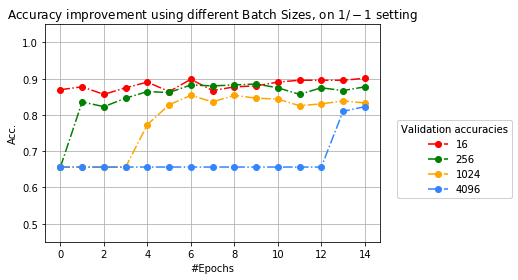

In [6]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Accuracy improvement using different Batch Sizes, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', "#3385ff", "#9999ff", "#009999", "#ff00ff", 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_BS16, = plt.plot(hist_df_BS16["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_BS256,  = plt.plot(hist_df_BS256["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
plt_vl_BS1024, = plt.plot(hist_df_BS1024["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])
plt_vl_BS4096, = plt.plot(hist_df_BS4096["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[3])

val_plots  = [plt_vl_BS16, plt_vl_BS256, plt_vl_BS1024, plt_vl_BS4096]
val_labels = ["16", "256", "1024", "4096"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .2), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

# plt_tr_BS16, = plt.plot(hist_df_BS16["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
# plt_tr_BS256,  = plt.plot(hist_df_BS256["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
# plt_tr_BS1024, = plt.plot(hist_df_BS1024["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
# plt_tr_BS4096, = plt.plot(hist_df_BS4096["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[3])
# tr_plots  = [plt_tr_BS16, plt_tr_BS256, plt_tr_BS1024, plt_tr_BS4096]
# tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
# tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .6), title="Training accuracies   ")





# plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.45, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/BatchSizes_val.pdf", bbox_inches='tight')
figure.savefig("../plots/BatchSizes_val.png", bbox_inches='tight')

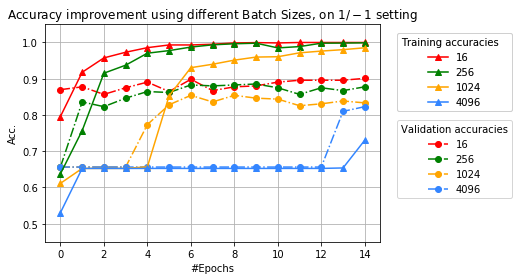

In [95]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Accuracy improvement using different Batch Sizes, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', "#3385ff", "#9999ff", "#009999", "#ff00ff", 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_BS16, = plt.plot(hist_df_BS16["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_BS256,  = plt.plot(hist_df_BS256["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
plt_vl_BS1024, = plt.plot(hist_df_BS1024["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])
plt_vl_BS4096, = plt.plot(hist_df_BS4096["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[3])

val_plots  = [plt_vl_BS16, plt_vl_BS256, plt_vl_BS1024, plt_vl_BS4096]
val_labels = ["16", "256", "1024", "4096"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .2), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_BS16, = plt.plot(hist_df_BS16["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_BS256,  = plt.plot(hist_df_BS256["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
plt_tr_BS1024, = plt.plot(hist_df_BS1024["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
plt_tr_BS4096, = plt.plot(hist_df_BS4096["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[3])
tr_plots  = [plt_tr_BS16, plt_tr_BS256, plt_tr_BS1024, plt_tr_BS4096]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .6), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.45, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/BatchSizes.pdf", bbox_inches='tight')
figure.savefig("../plots/BatchSizes.png", bbox_inches='tight')

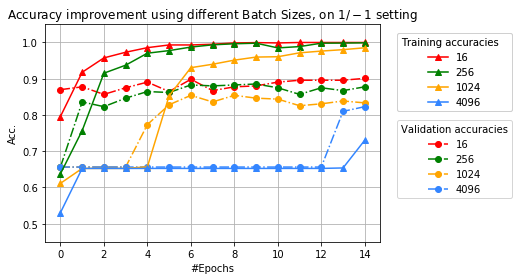

In [95]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Accuracy improvement using different Batch Sizes, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', "#3385ff", "#9999ff", "#009999", "#ff00ff", 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_BS16, = plt.plot(hist_df_BS16["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_BS256,  = plt.plot(hist_df_BS256["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
plt_vl_BS1024, = plt.plot(hist_df_BS1024["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])
plt_vl_BS4096, = plt.plot(hist_df_BS4096["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[3])

val_plots  = [plt_vl_BS16, plt_vl_BS256, plt_vl_BS1024, plt_vl_BS4096]
val_labels = ["16", "256", "1024", "4096"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .2), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_BS16, = plt.plot(hist_df_BS16["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_BS256,  = plt.plot(hist_df_BS256["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
plt_tr_BS1024, = plt.plot(hist_df_BS1024["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
plt_tr_BS4096, = plt.plot(hist_df_BS4096["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[3])
tr_plots  = [plt_tr_BS16, plt_tr_BS256, plt_tr_BS1024, plt_tr_BS4096]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .6), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.45, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/BatchSizes.pdf", bbox_inches='tight')
figure.savefig("../plots/BatchSizes.png", bbox_inches='tight')

# Pretrained embedding comparison

In [61]:
h_ft300 = "../histories/survey/history_FT_OPT_0_GRUStack_FastText_valAcc0.718_104938_20200511.csv"
h_gltw  = "../histories/survey/history_sRAM_OPT_0_GRUStack_GloVe_valAcc0.731_110700_20200511.csv"
h_gl800 = "../histories/survey/history_GL800_OPT_0_GRUStack_GloVe_valAcc0.736_105911_20200511.csv"


In [66]:
hist_df_ft300 = pd.read_csv(h_ft300)
hist_df_gltw  = pd.read_csv(h_gltw)
hist_df_gl800 = pd.read_csv(h_gl800)

# hist_df_df_bil_0, 
hist_df_gltw.head()

,Unnamed: 0,val_loss,val_acc,loss,acc
0,0,0.630605,0.690763,0.585092,0.688012
1,1,0.547288,0.724230,0.521484,0.746029
2,2,0.541677,0.745649,0.486318,0.765424
3,3,0.547629,0.729585,0.462870,0.780304
4,4,0.517890,0.749665,0.442647,0.795018


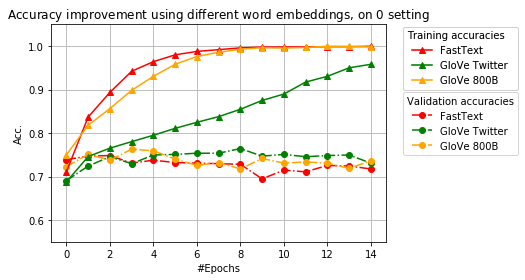

In [85]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Accuracy improvement using different word embeddings, on $0$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_ft300, = plt.plot(hist_df_ft300["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_gltw,  = plt.plot(hist_df_gltw["val_acc"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
plt_vl_gl800, = plt.plot(hist_df_gl800["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])

val_plots  = [plt_vl_ft300, plt_vl_gltw, plt_vl_gl800]
val_labels = ["FastText", "GloVe Twitter", "GloVe 800B"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .4), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_ft300, = plt.plot(hist_df_ft300["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_gltw,  = plt.plot(hist_df_gltw["acc"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
plt_tr_gl800, = plt.plot(hist_df_gl800["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
tr_plots  = [plt_tr_ft300, plt_tr_gltw, plt_tr_gl800]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .7), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/FastTextvsGloVeTwittervsGloVe800B.pdf", bbox_inches='tight')
figure.savefig("../plots/FastTextvsGloVeTwittervsGloVe800B.png", bbox_inches='tight')

# BiLSTM vs CNN vs GRUStack encoders, on 1/-1 setting

In [21]:
h_bil_1M1 = "../histories/survey/history_lRAM_OPT_1M1_BiLSTM_FastText_valAcc0.865_111628_20200511.csv"
h_cnn_1M1 = "../histories/survey/history_lRAM_OPT_1M1_CNN_FastText_valAcc0.891_111906_20200511.csv"
# h_gru_1M1 = "../histories/survey/history_lRAM_OPT_1M1_GRUStack_valAcc0.707_213449_20200323.csv"
h_gru_1M1 = "../histories/survey/history_BS16_OPT_1M1_GRUStack_FastText_valAcc0.901_103433_20200511.csv"

In [22]:
hist_df_bil_1M1 = pd.read_csv(h_bil_1M1)
hist_df_cnn_1M1 = pd.read_csv(h_cnn_1M1)
hist_df_gru_1M1 = pd.read_csv(h_gru_1M1)

# hist_df_bil_0, 
hist_df_cnn_1M1.head()

,Unnamed: 0,val_loss,val_accuracy,loss,accuracy
0,0,0.339302,0.854167,0.514568,0.737252
1,1,0.368773,0.854167,0.195760,0.923352
2,2,0.411450,0.890625,0.065279,0.980838
3,3,0.591922,0.893229,0.021545,0.993504
4,4,0.781552,0.880208,0.005644,0.998051


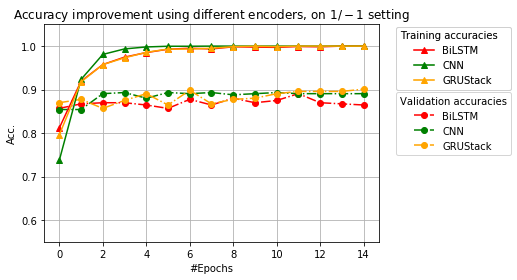

In [23]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Accuracy improvement using different encoders, on $1/-1$ setting")
lc = ['b', 'purple', 'y', 'r', "g",'orange', 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_bil_1M1, = plt.plot(hist_df_bil_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_cnn_1M1, = plt.plot(hist_df_cnn_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
plt_vl_gru_1M1, = plt.plot(hist_df_gru_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])

val_plots  = [plt_vl_bil_1M1, plt_vl_cnn_1M1, plt_vl_gru_1M1]
val_labels = ["BiLSTM", "CNN", "GRUStack"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .4), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_bil_1M1, = plt.plot(hist_df_bil_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_cnn_1M1, = plt.plot(hist_df_cnn_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
plt_tr_gru_1M1, = plt.plot(hist_df_gru_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
tr_plots  = [plt_tr_bil_1M1, plt_tr_cnn_1M1, plt_tr_gru_1M1]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .7), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/BiLSTMvsCNNvsGRUStack_1M1.pdf", bbox_inches='tight')
figure.savefig("../plots/BiLSTMvsCNNvsGRUStack_1M1.png", bbox_inches='tight')

## BiLSTM 0 vs 1M1 setiings

In [2]:
h_bil_0   = "../histories/survey/history_lRAM_OPT_0_BiLSTM_FastText_valAcc0.716_111023_20200511.csv"
h_bil_1M1 = "../histories/survey/history_lRAM_OPT_1M1_BiLSTM_FastText_valAcc0.865_111628_20200511.csv"

In [3]:
hist_df_bil_0   = pd.read_csv(h_bil_0)
hist_df_bil_1M1 = pd.read_csv(h_bil_1M1)

# hist_df_bil_0, 
hist_df_bil_1M1.head()

,Unnamed: 0,val_loss,val_accuracy,loss,accuracy
0,0,0.374634,0.856771,0.412168,0.811627
1,1,0.360679,0.867188,0.217310,0.919130
2,2,0.500888,0.869792,0.120569,0.957454
3,3,0.468101,0.869792,0.077116,0.974667
4,4,0.564036,0.864583,0.039573,0.985060


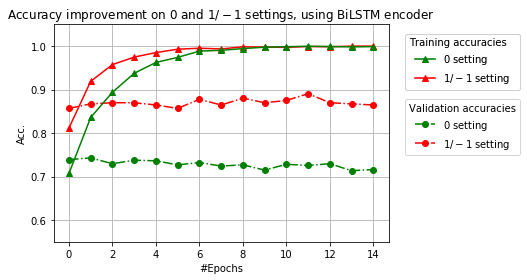

In [4]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Accuracy improvement on $0$ and $1/-1$ settings, using BiLSTM encoder")
lc = ['b', 'purple', 'y', 'r', "g",'orange', 'c', 'm', 'y', 'k'][3:]#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

# plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_bil_1M1, = plt.plot(hist_df_bil_1M1["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_bil_0,   = plt.plot(hist_df_bil_0["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
val_plots  = [plt_vl_bil_0, plt_vl_bil_1M1]
val_labels = ["$0$ setting", "$1/-1$ setting"]

val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .4), title="Validation accuracies")


# plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_bil_1M1, = plt.plot(hist_df_bil_1M1["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_bil_0,   = plt.plot(hist_df_bil_0["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
tr_plots  = [plt_tr_bil_0, plt_tr_bil_1M1]
tr_labels = val_labels#["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .7), title="Training accuracies   ")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/BiLSTM_0vs1M1.pdf", bbox_inches='tight')
figure.savefig("../plots/BiLSTM_0vs1M1.png", bbox_inches='tight')

# Additional Plots

In [5]:
# h_fn = "fullstack/largeRAM/TSA/glove//history_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320.csv"
h_fn_bil_gl = "../histories/fullstack/largeRAM/TSA/glove/history_lRAM_TSA_0_BiLSTM_valAcc0.714_134843_20200320.csv"

h_fn_cnn_gl = "../histories/fullstack/largeRAM/TSA/glove/history_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320.csv"
h_fn_cnn_ft = "../histories/fullstack/largeRAM/TSA/fasttext/history_lRAM_TSA_0_CNN_valAcc0.712_124853_20200320.csv"

h_fn_gru_gl = "../histories/fullstack/largeRAM/TSA/glove/history_lRAM_TSA_0_GRUStack_valAcc0.706_132245_20200320.csv"
h_fn_gru_ft = "../histories/fullstack/largeRAM/TSA/fasttext/history_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320.csv"


h_fn_gru_gltw = "../histories/largeRAM/history_lRAM_TSA_0_GRUStack_GloVeTw_valAcc0.733_153403_20200327.csv"


In [6]:
hist_df_bil_gl = pd.read_csv(h_fn_bil_gl)
# hist_df_bil_ft = pd.read_csv(h_fn_bil_ft)

hist_df_cnn_gl = pd.read_csv(h_fn_cnn_gl)
hist_df_cnn_ft = pd.read_csv(h_fn_cnn_ft)

hist_df_gru_gl = pd.read_csv(h_fn_gru_gl)
hist_df_gru_ft = pd.read_csv(h_fn_gru_ft)
# hist_df.head()

hist_df_gru_gltw = pd.read_csv(h_fn_gru_gltw)

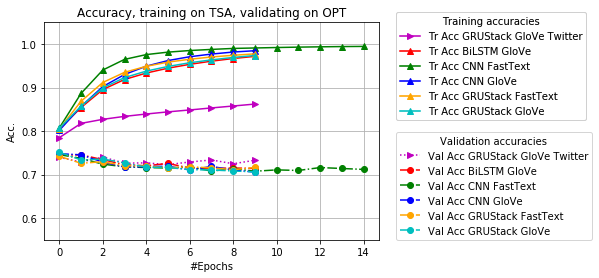

In [17]:
#FastText GloVe 800d:
#../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]


figure = plt.figure()

plt.title("Accuracy, training on TSA, validating on OPT")
lc = ['r', 'g', 'b', 'orange', 'c', 'm', 'y', 'k']#[::-1]#line_colors
tr_marker   = "^"
tr_ls       = "-" #Line styles
vl_marker   = "o"
vl_ls       = "-."

plt_vl_gru_gltw, = plt.plot(hist_df_gru_gltw["val_accuracy"], marker=">", linestyle=":", c=lc[5]) 

plt_vl_bil_gl, = plt.plot(hist_df_bil_gl["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[0])
plt_vl_cnn_ft, = plt.plot(hist_df_cnn_ft["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[1])
plt_vl_cnn_gl, = plt.plot(hist_df_cnn_gl["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[2])
plt_vl_gru_ft, = plt.plot(hist_df_gru_ft["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[3])
plt_vl_gru_gl, = plt.plot(hist_df_gru_gl["val_accuracy"], marker=vl_marker, linestyle=vl_ls, c=lc[4])
val_plots  = [plt_vl_gru_gltw, plt_vl_bil_gl, plt_vl_cnn_ft, plt_vl_cnn_gl\
              , plt_vl_gru_ft, plt_vl_gru_gl]
val_labels = ["Val Acc GRUStack GloVe Twitter", "Val Acc BiLSTM GloVe", "Val Acc CNN FastText", "Val Acc CNN GloVe"\
              , "Val Acc GRUStack FastText", "Val Acc GRUStack GloVe"]
val_legend = plt.legend(val_plots, val_labels, loc=(1.05, .0), title="Validation accuracies")


plt_tr_gru_gltw, = plt.plot(hist_df_gru_gltw["accuracy"], marker=">", linestyle="-", c=lc[5]) 

plt_tr_bil_gl, = plt.plot(hist_df_bil_gl["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[0])
plt_tr_cnn_ft, = plt.plot(hist_df_cnn_ft["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[1])
plt_tr_cnn_gl, = plt.plot(hist_df_cnn_gl["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[2])
plt_tr_gru_ft, = plt.plot(hist_df_gru_ft["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[3])
plt_tr_gru_gl, = plt.plot(hist_df_gru_gl["accuracy"], marker=tr_marker, linestyle=tr_ls, c=lc[4])
tr_plots  = [plt_tr_gru_gltw, plt_tr_bil_gl, plt_tr_cnn_ft, plt_tr_cnn_gl\
                 , plt_tr_gru_ft, plt_tr_gru_gl]
tr_labels = ["Tr Acc GRUStack GloVe Twitter", "Tr Acc BiLSTM GloVe", "Tr Acc CNN FastText", "Tr Acc CNN GloVe"\
             , "Tr Acc GRUStack FastText", "Tr Acc GRUStack GloVe"]
tr_legend = plt.legend(tr_plots, tr_labels, loc=(1.05, .55), title="Training accuracies")





plt.gca().add_artist(tr_legend)
plt.gca().add_artist(val_legend)

plt.ylabel("Acc.")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.55, ymax = 1.05)
# plt.legend()
plt.show()

figure.savefig("../plots/TSA_train_OPT_test.png", bbox_inches='tight')
figure.savefig("../plots/TSA_train_OPT_test.pdf", bbox_inches='tight')

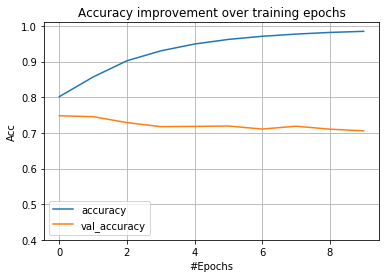

In [22]:
#GloVe 800d:
#config_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320

# validation_errors = training_history.history["val_acc"]
# training_errors   = training_history.history["acc"]

plt.title("Accuracy improvement over training epochs")
plt.plot(hist_df["accuracy"])
# plt.plot(training_errors, label="Training Acc")
# plt.plot(validation_errors, label = "Validation Acc" )
plt.plot(hist_df["val_accuracy"])
plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, ymax = 1.01)
plt.legend()
plt.show()

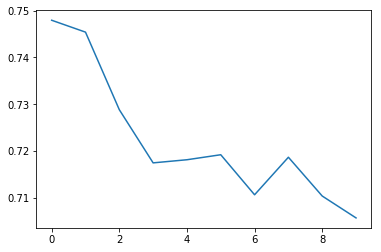

In [19]:
plt.plot(hist_df["val_accuracy"])

In [17]:
sns.lineplot(x="val_accuracy", data=hist_df)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

# Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy   as np
import pandas  as pd
import seaborn as sns; sns.set(color_codes=True)

In [8]:
# opt_df = pd.read_csv("../../data/optimism-twitter-data/tweets_annotation.csv")
opt_df_train = pd.read_csv("../../data/optimism-twitter-data/processed/optimism_set0_train.csv")
opt_df       = opt_df_train
# opt_df.head()
opt_df_train.head()

,Unnamed: 0,Tweet,Username,AverageAnnotation,Original ID
0,220,@runge_kelly rest is good!! if you like tea an...,TheAnglophiler,1.25,220
1,916,dr. budiani-saberi is a medical anthropologist...,JessiKersi,0.00,916
2,321,i want city to win. chelsea going up too far w...,Ajinkyaworld,1.50,321
3,2127,you're annoying the piss out of me,TehhKota,-1.80,2127
4,5643,@arapahoe_basin looking good for tomorrow's sk...,tomfricke,0.60,5643


In [9]:
opt_df["Length"] = opt_df["Tweet"].apply(lambda tweet: len(tweet.split(" ")))
opt_df["0"]      = opt_df["AverageAnnotation"].apply(lambda ann: 0 if ann<=0 else 1)
opt_df["1/-1"]   = opt_df["AverageAnnotation"].apply(lambda ann: 0 if ann<=-1 else \
                                                     (1 if ann >= 1 else np.nan))

opt_df["2.5/-2.5"]   = opt_df["AverageAnnotation"].apply(lambda ann: 0 if ann<=-2.5 else \
                                                     (1 if ann >= 2.5 else np.nan))
opt_df.head()

,Unnamed: 0,Tweet,Username,AverageAnnotation,Original ID,Length,0,1/-1,2.5/-2.5
0,220,@runge_kelly rest is good!! if you like tea an...,TheAnglophiler,1.25,220,20,1,1.0,NaN
1,916,dr. budiani-saberi is a medical anthropologist...,JessiKersi,0.00,916,18,0,NaN,NaN
2,321,i want city to win. chelsea going up too far w...,Ajinkyaworld,1.50,321,28,1,1.0,NaN
3,2127,you're annoying the piss out of me,TehhKota,-1.80,2127,7,0,0.0,NaN
4,5643,@arapahoe_basin looking good for tomorrow's sk...,tomfricke,0.60,5643,8,1,NaN,NaN


# Annotations distribution

In [55]:
np.arange(-3, 3+.1, 6/24)

len(np.arange(-3, 3+.1, 6/24))//2

12

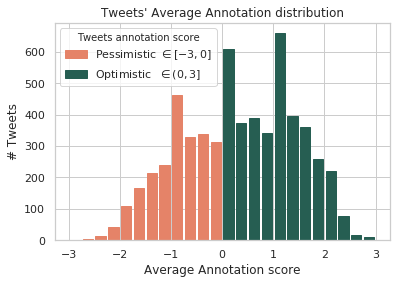

In [17]:
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns

sns.set_style("whitegrid")

n_bins = 24
bins   = np.arange(-3, 3+6/n_bins, 6/n_bins)

#Set 1M1
#red, mid red, mid green, green
# colors    = ["#e74c3c", sns.xkcd_rgb["pale red"], "#2ecc71",  sns.xkcd_rgb["medium green"]]
# colors = sns.color_palette("RdBu", n_colors=7)[:2] + sns.color_palette("ch:2.5,-.2,dark=.3")[2::3]
# divisions = [range(8), range(8, 12), range(12, 16), range(16, 24)]
# labels    = [  "Pessimistic         $\in [-3, -1]$"\
#              , "Mild pessimistic $\in (-1, 0]$"\
#              , "Mild optimistic   $\in (0, 1)$"\
#              , "Optimitstic         $\in [1, 3]$"]


#Set 0
colors    = ["#e74c3c", sns.xkcd_rgb["medium green"]]
colors    = sns.color_palette("RdBu", n_colors=7)[:1] + sns.color_palette("ch:2.5,-.2,dark=.3")[-3:-2]
colors    = sns.color_palette("RdBu", n_colors=7)[1:2] + sns.color_palette("ch:2.5,-.2,dark=.3")[-1:]
divisions = [range(len(bins)//2+1), range(len(bins)//2, len(bins))] 
labels    = [  "Pessimistic $\in [-3, 0]$"\
             , "Optimistic  $\in (0, 3]$"]

#Plot distribution:
# import pylab as pl
figure = plt.figure()
N, bins, patches = plt.hist(opt_df.AverageAnnotation, bins=bins, rwidth=0.8)

jet = plt.get_cmap('jet', len(patches))#[::-1]

for d in divisions:
    patches[list(d)[0]].set_label(labels[divisions.index(d)])
    for i in d[:-1]:
        patches[i].set_color(colors[divisions.index(d)])

        
plt.title("Tweets' Average Annotation distribution")
plt.xlabel("Average Annotation score")
plt.ylabel("# Tweets")
# plt.legend()
plt.legend(title="Tweets annotation score")#, loc=(1.05, .6))
# plt.legend(title="Tweets annotation score", loc=(1.05, .6))
# for i in range(4):
#     patches[i].set_color(colors[0])
# plt.ylim(0, 720)
# plt.ylim(0, 650)

figure.savefig("../plots/AverageAnnotation_distribuition_set0.png", bbox_inches='tight')
figure.savefig("../plots/AverageAnnotation_distribuition_set0.pdf", bbox_inches='tight')
    
# for i in range(len(patches)):#, -1, -1):
#     patches[i].set_facecolor(jet(i))


In [11]:
4679/7475

0.6259531772575251

In [63]:
divisions, patches

([range(0, 12), range(12, 24)], <a list of 23 Patch objects>)

In [48]:
list(patches)[0]

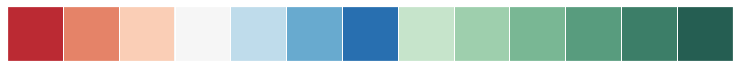

In [21]:
sns.palplot(sns.color_palette("RdBu", n_colors=7) + sns.color_palette("ch:2.5,-.2,dark=.3"))

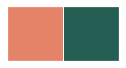

In [5]:
sns.palplot(sns.color_palette("RdBu", n_colors=7)[1:2] + sns.color_palette("ch:2.5,-.2,dark=.3")[-1:])

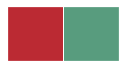

In [2]:
sns.palplot(sns.color_palette("RdBu", n_colors=7)[:1] + sns.color_palette("ch:2.5,-.2,dark=.3")[-3:-2])

In [9]:
colors

[(0.7340253748558246, 0.16608996539792387, 0.20261437908496732),
 (0.14865613980209474, 0.3694246796894158, 0.3225606287551497)]

In [13]:
#Seaborn red to blue
sns.color_palette("RdBu", n_colors=7)[:2]
#SEaborn green
sns.color_palette("ch:2.5,-.2,dark=.3")

# colors = sns.color_palette("RdBu", n_colors=7)[:2] + colors[2:]
colors = sns.color_palette("RdBu", n_colors=7)[:2] + sns.color_palette("ch:2.5,-.2,dark=.3")[2::3]

colors

[(0.7340253748558246, 0.16608996539792387, 0.20261437908496732),
 (0.8991926182237601, 0.5144175317185697, 0.4079200307574009),
 (0.4750949860855904, 0.7199630470162806, 0.5824150697662294),
 (0.14865613980209474, 0.3694246796894158, 0.3225606287551497)]

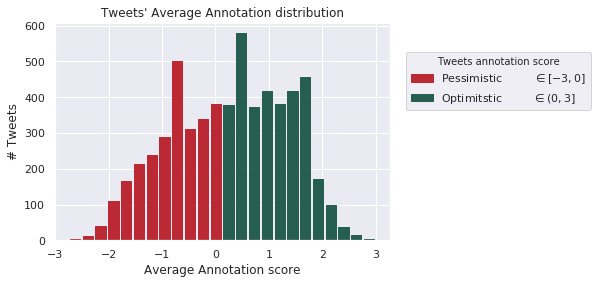

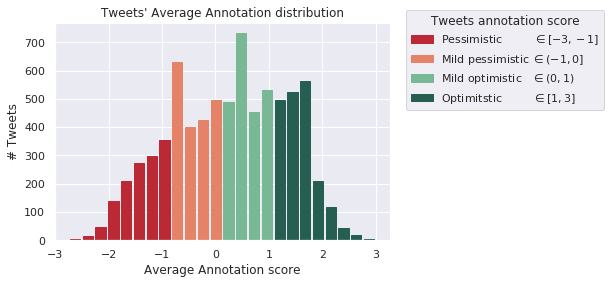

In [14]:
# import pylab as pl
figure = plt.figure()
N, bins, patches = plt.hist(opt_df.AverageAnnotation, bins=24, rwidth=0.8)

jet = plt.get_cmap('jet', len(patches))#[::-1]

for d in divisions:
    patches[list(d)[0]].set_label(labels[divisions.index(d)])
    for i in d:
        patches[i].set_color(colors[divisions.index(d)])

        
plt.title("Tweets' Average Annotation distribution")
plt.xlabel("Average Annotation score")
plt.ylabel("# Tweets")
plt.legend(title="Tweets annotation score", loc=(1.05, .6))
# for i in range(4):
#     patches[i].set_color(colors[0])
    

figure.savefig("../plots/AverageAnnotation_distribuition.png", bbox_inches='tight')
figure.savefig("../plots/AverageAnnotation_distribuition.pdf", bbox_inches='tight')
    
# for i in range(len(patches)):#, -1, -1):
#     patches[i].set_facecolor(jet(i))

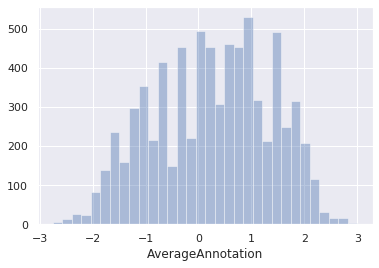

In [6]:
sns.distplot(opt_df.AverageAnnotation, kde=False)
# sns.kdeplot(opt_df.AverageAnnotation)

In [ ]:
def get_sentiment_words_with_count(dataset):
    positive_words = []
    negative_words = []
    details = []
    for i, tweet in enumerate(dataset):
        words = tweet.translate(str.maketrans('', '', '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~')).lower().split(' ')
        # print(words)
        count_poz = 0
        count_neg = 0
        for word in words:
          #  print(word)
            embedding_vector = embeddings_index.get(word)
#             pos_emb_vector = positive_em(word);
          #  print(embedding_vector.shape)
            if embedding_vector is not None and len(embedding_vector):
                embedding_vector = embedding_vector.reshape(1, -1)
                if(len(get_target_words(embedding_vector, positive_em, positive_df))):
                    positive_words = positive_words + get_target_words(embedding_vector, positive_em, positive_df)
                    count_poz = count_poz + 1
                if(len(get_target_words(embedding_vector, negative_em, negative_df))):    
                    negative_words = negative_words + get_target_words(embedding_vector, negative_em, negative_df)
                    count_neg = count_neg + 1
        details = details + [(tweet, count_poz, count_neg)]
    return positive_words, negative_words, details

In [ ]:
def get_polarity_words_from_tweet(tweet):
    words = tweet.translate(str.maketrans('', '', '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~')).lower().split(' ')
   
    pozitive_words = []
    negative_words = []
    
    for word in tweet:
          #  print(word)
            embedding_vector = embeddings_index.get(word)
#             pos_emb_vector = positive_em(word);
          #  print(embedding_vector.shape)
            if embedding_vector is not None and len(embedding_vector):
                embedding_vector = embedding_vector.reshape(1, -1)
                if(len(get_target_words(embedding_vector, positive_em, positive_df))):
                    positive_words.append(word)
#                     positive_words = positive_words + get_target_words(embedding_vector, positive_em, positive_df)

                if(len(get_target_words(embedding_vector, negative_em, negative_df))):    
#                     negative_words = negative_words + get_target_words(embedding_vector, negative_em, negative_df)
                    negative_words.append(word)
    return positive_words, negative_words

opt_df["# (P,N) words"] = opt_df["Tweet"].apply(lambda tweet:list(map(len\
                                                      , get_polarity_words_from_tweet(tweet))))

opt_df["# Positive Words"] = opt_df["# (P,N) words"].apply(lambda pn: pn[0])
opt_df["# Negative Words"] = opt_df["# (P,N) words"].apply(lambda pn: pn[1])


# opt_df["# Positive Words"]      = opt_df["Tweet"].apply(lambda tweet:len(get_polarity_words_from_tweet(tweet)[0]))
# opt_df["# Negative Words"]      = opt_df["Tweet"].apply(lambda tweet:len(get_polarity_words_from_tweet(tweet)[1]))

In [32]:
list(map(len, (["ana", "are"], ["mere"])))

[2, 1]

In [65]:
opt_df["2/-2"].notnull().sum()

opt_df[opt_df["2/-2"]==0].shape, opt_df[opt_df["2/-2"]==1].shape

((14, 7), (35, 7))

## Lengths

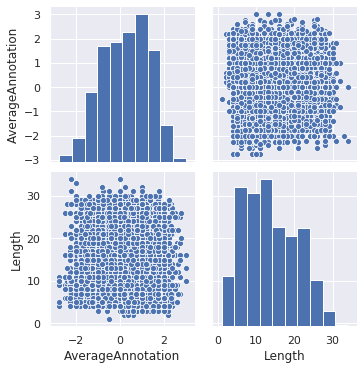

In [22]:
sns.pairplot(opt_df, vars=["AverageAnnotation", "Length"])

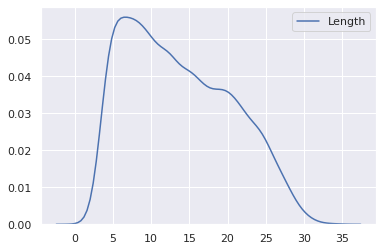

In [32]:
sns.kdeplot(opt_df.Length, )

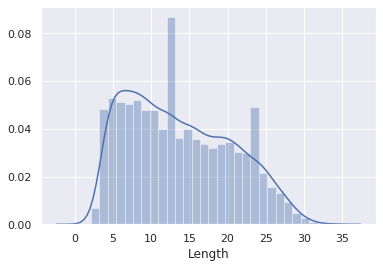

In [31]:
sns.distplot(opt_df.Length, )

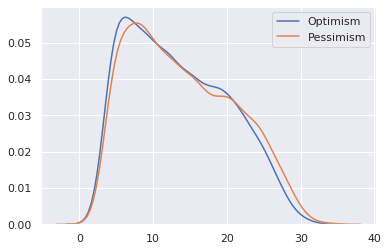

In [34]:
sns.kdeplot(opt_df[opt_df["0"]==1].Length, label="Optimism")
sns.kdeplot(opt_df[opt_df["0"]==0].Length, label="Pessimism")

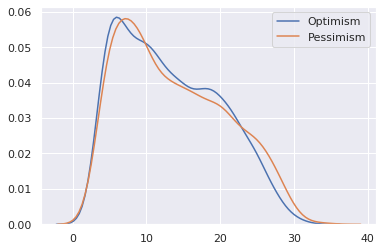

In [35]:
sns.kdeplot(opt_df[opt_df["1/-1"]==1].Length, label="Optimism")
sns.kdeplot(opt_df[opt_df["1/-1"]==0].Length, label="Pessimism")

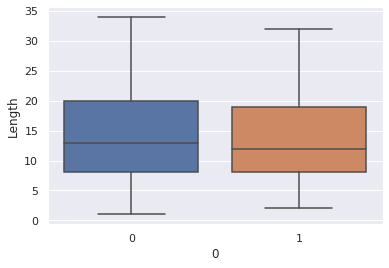

In [49]:
sns.boxplot(x="0", y="Length", data=opt_df)

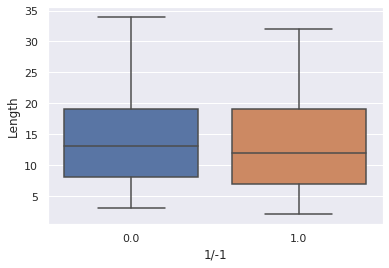

In [48]:
sns.boxplot(x="1/-1", y="Length", data=opt_df)

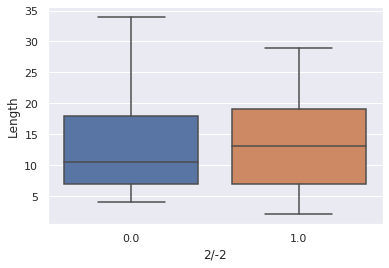

In [56]:
sns.boxplot(x="2/-2", y="Length", data=opt_df)

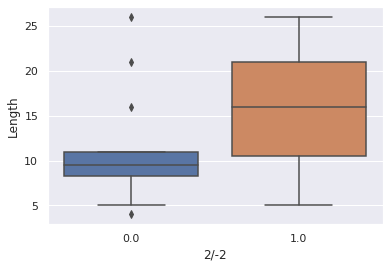

In [54]:
sns.boxplot(x="2/-2", y="Length", data=opt_df)

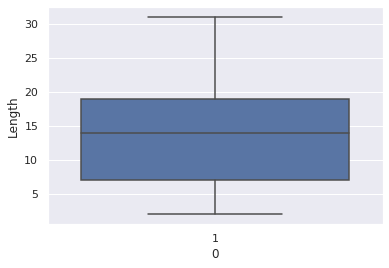

In [21]:
#OPtimist
sns.boxplot(x="0", y="Length"\
            , data=opt_df.sort_values("AverageAnnotation", ascending=False).head(500)\
            )


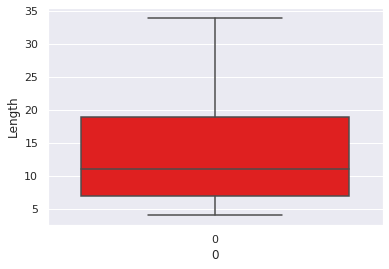

In [20]:
#Pessimist
sns.boxplot(x="0", y="Length"\
            , data=opt_df.sort_values("AverageAnnotation", ascending=True).head(500)\
           , color="red")

## Annotations

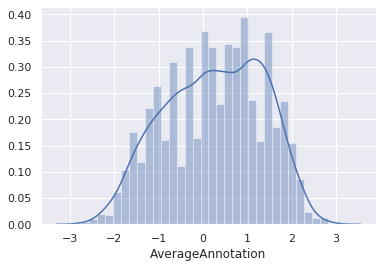

In [25]:
sns.distplot(opt_df.AverageAnnotation)

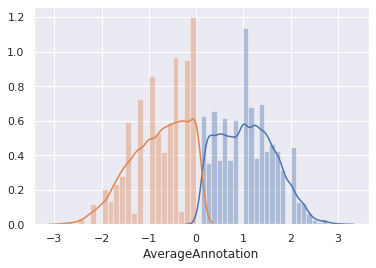

In [38]:
sns.distplot(opt_df[opt_df["0"]==1].AverageAnnotation, label="Optimism")
sns.distplot(opt_df[opt_df["0"]==0].AverageAnnotation, label="Pessimism")

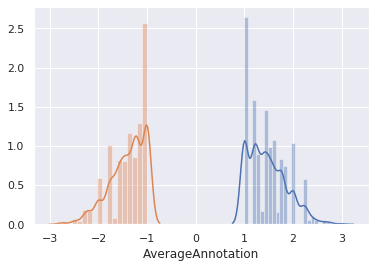

In [37]:
sns.distplot(opt_df[opt_df["1/-1"]==1].AverageAnnotation, label="Optimism")
sns.distplot(opt_df[opt_df["1/-1"]==0].AverageAnnotation, label="Pessimism")

# Extreme Annotations

In [67]:
# opt_df.sort_values("AverageAnnotation", ascending=True).head(50)
opt_df.sort_values("AverageAnnotation", ascending=False).head(50)

,Tweet,Username,AverageAnnotation,Length,0,1/-1,2/-2
928,always try to give the world. as much love and...,Jimboslim3,3.000000,16,1,1.0,1.0
994,always try to be positive. optimistic. and hop...,Jimboslim3,3.000000,10,1,1.0,1.0
5352,life is good. god is great and i have absolute...,BridgetAKennedy,3.000000,13,1,1.0,1.0
5686,when the day is over and you have not reached ...,franciskong,2.800000,26,1,1.0,1.0
6402,be positive. think positive and live positive....,franciskong,2.800000,20,1,1.0,1.0
3544,with the support of my early morning gym famil...,BridgetAKennedy,2.750000,25,1,1.0,1.0
2351,goood morning and today is christmas day!!!!! ...,IsaFueled,2.750000,19,1,1.0,1.0
2441,happy birthday to our friend. @vfbeauty. wishi...,lovephilosophy,2.750000,11,1,1.0,1.0
6710,as you plant the seeds of kindness. they will ...,DTNEtiquette,2.750000,16,1,1.0,1.0
7252,never forget the three powerful resources you ...,kenkoco1,2.750000,15,1,1.0,1.0


In [39]:
opt_df.sort_values("AverageAnnotation", ascending=True)

,Tweet,Username,AverageAnnotation,Length,0,1/-1
1598,wooow all my confidence just went down the drain.,xSteph_aniee,-2.75,9,0,0.0
675,work night from hell,CarverKrista,-2.75,4,0,0.0
578,i feel so empty and dark inside i just wanna die,ShadowNinja1611,-2.75,11,0,0.0
2926,@pandorahjack @odd_visored i'll kill a bitch i...,Demonic_Abigail,-2.75,10,0,0.0
5337,literally everyone fuck off please,Cadam02,-2.75,5,0,0.0
...,...,...,...,...,...,...
5686,when the day is over and you have not reached ...,franciskong,2.80,26,1,1.0
6402,be positive. think positive and live positive....,franciskong,2.80,20,1,1.0
928,always try to give the world. as much love and...,Jimboslim3,3.00,16,1,1.0
994,always try to be positive. optimistic. and hop...,Jimboslim3,3.00,10,1,1.0


In [26]:
opt_df.iloc[5760]["Tweet"]

"some dude on here looks like jesus with his curly ass long blonde hair and is pissing me off bc he's such a know it all"

In [31]:
opt_df.sort_values("AverageAnnotation", ascending=False).iloc[-200:][["Tweet", "AverageAnnotation", "Length"]]

,Tweet,AverageAnnotation,Length
5999,wtf is wrong with our society,-1.80,6
6574,i cried like 5 times already,-1.80,6
4124,@themattespinosa i'm ugly wyd,-1.80,4
6880,@disneyfiancee oh god i would have lost it,-1.80,8
6550,this fucking laptop keeps shutting down by its...,-1.80,10
...,...,...,...
2926,@pandorahjack @odd_visored i'll kill a bitch i...,-2.75,10
1598,wooow all my confidence just went down the drain.,-2.75,9
5337,literally everyone fuck off please,-2.75,5
675,work night from hell,-2.75,4


In [73]:
opt_df.sort_values("AverageAnnotation", ascending=False).iloc[:5][["Tweet", "AverageAnnotation", "Length"]]

,Tweet,AverageAnnotation,Length
928,always try to give the world. as much love and...,3.0,16
994,always try to be positive. optimistic. and hop...,3.0,10
5352,life is good. god is great and i have absolute...,3.0,13
5686,when the day is over and you have not reached ...,2.8,26
6402,be positive. think positive and live positive....,2.8,20


# Stack Overflow response

https://stackoverflow.com/questions/43831029/matplotlib-seaborn-histogram-using-different-colors-for-grouped-bins/61794768#61794768

_If you want to color specific divisions with specific colors and label them accordingly you can use the following code:_

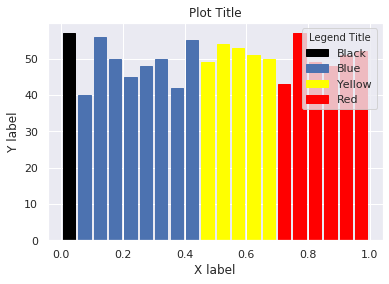

In [9]:
import matplotlib.pyplot as plt
import numpy             as np
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

np.random.seed(1)
figure = plt.figure()
number_of_bins = 20
N, bins, patches = plt.hist(np.random.rand(1000), number_of_bins, rwidth=0.8)

#Define the colors for your pathces (you can write them in any format):
colors    = [(0, 0, 0), "b", "#ffff00", "red"]
#Define the ranges of your patches:
divisions = [range(1), range(1, 9), range(9, 14), range(14, 20)]
#If you want to label the regions/divisions:
labels    = ["Black", "Blue", "Yellow", "Red"]

#for each division color the parches according to the specified colors:
for d in divisions:
    patches[list(d)[0]].set_label(labels[divisions.index(d)])
    for i in d:
        patches[i].set_color(colors[divisions.index(d)])

        
plt.title("Plot Title")
plt.xlabel("X label")
plt.ylabel("Y label")
plt.legend(title="Legend Title")

figure.savefig("../plots/patches_histogram.png", bbox_inches='tight')
